# Introducción

El presente trabajo presenta el desarrollo del juego Quoridor como trabajo del curso de Complejidad Algorítmica. El objetivo del trabajo es utilizar los conocimientos adquiridos en clase en la solución de problemas y en la búsqueda de posibles soluciones a estos. Enfocandose en que la respuesta sea convincente y la más eficiente.

El desarrollo del juego ayudará a hacer uso de estructuras de datos y algoritmos mostrados en el curso. Así, podemos demostrar ser capaces de utilizar estas herramientas en problemas que se presentan en el transcurso de nuestra vida. Estas herramientas, se utilizar día a día en diversas situaciones. Si bien las personas no se enfocan en volver a crearlas, estás necesitan entenderlas para poder darles uso y crear soluciones innovadoras.

El grupo es conformado por estudiantes de la carrera de Ingeniería de Software. Nuestra motivación para el trabajo es poder ser participes del diseño de un juego que involucre el uso de algoritmos para su desarrollo. Asimismo, nos motiva la metodología cientifica que tiene el proyecto para su realización, ya que nos permite estar en los zapatos de una persona que estudia estos temas a mayor profundidad y a entender su motivación y su cariño a su futura profesión.

# Estado del Arte

Los algoritmos usados en el implementación del proyecto se listan a continuación:

*   A\*(Algoritmo A estrella): Este algoritmo es utilizado para encontrar el camino más corto desde un nodo inicial a un nodo final. Además, cuenta con una alta flexibilidad y utilizable en una variedad amplia de contextos. En lo que respecta a su tiempo de ejecución se le puede considerar tan rápido como el algoritmo Greedy Best First-Search. También, A* calcula el camino más corto tomando en cuenta los vértices más próximos al punto inicial, como el algoritmo de Dijstra, y los vértices más cercanos al punto final, como el algoritmo Greedy Best First' Search, balanceando ambos resultados para hallar el camino más corto.
*   Dijkstra: Este algoritmo recorre todos los nodos de un grafo priorizando los vértices adyacentes y marcando aquellos vértices que tengan la menor distancia posible a partir del vértice inicial. Este proceso se realiza de forma recursiva hasta recorrer todos lo vértices del grafo, lo que resulta en un árbol que tiene como ráiz el punto inicial y que muestra los caminos más cortos a cada nodo.(GeekForGeeks,s.f.)

Asímismo, para los otros dos jugadores se decidió utilizar dos algoritmos implementados en el módulo networkx para utilizarlos en la comparación entre dichos algoritmos y los dos anteriormente mencionados, A\* y Dijkstra. Estos algoritmos son:
* Bellman-ford
* Shortest Path

Además, se implementará un fragmento de código que pueda medir los tiempos que toma cada uno de los algoritmos en cada ajugada. Luego, se sacará un promedio del tiempo total entre la cantidad de jugadas de cada jugador. Los resutados de las pruebas que nos ayudarán a comparar los dos algoritmos implementados y los 2 algoritmos por defecto se podrán encontrar en el archivo "prueba_de_algoritmos.txt".

# Metodología

Para el juego, se genera un table de $n$ filas y $m$ columnas. Estas variables pueden ser modificadas por el usuario haciendo uso de los campos que se encuentran al lado derecho de los bloques de código. Con esta facilidad para cambiar los valores de los datos del tablero, podemos experimentar con diferentes dimensiones. En este caso, se están tomando como datos de entrada los siguientes valores, cada punto representa las dimensiones del tablero a utilizar de la forma $n \times m$, donde $n$ representa las filas y $m$ las columnas:

*   $9\times9$
*   $19\times19$
*   $29\times29$
*   $49\times49$
*   $59\times59$
*   $69\times69$

Como se puede apreciar en la lista mostrada anteriormente, los valores son de la forma $10^i - 1$, así podemos tomar una muestra en donde los valores crezcan de forma rápida y determinar una aproximación para el valor en donde los algoritmos utilizados para el proyecto empiezan a dejar de ser tan eficientes.

Para los jugadores, como se mencionó en la sección **Estado del Arte**, se planea usar los algoritmos mencionados de forma que cada jugador funcione con un algoritmo de la lista. así podremos ver las diferencias entre cada uno de estos.

En el proyecto, se ha establecido como espacio de solución, para cada jugador, cada uno de los caminos que les permitan posicionarse en una posición en donde sean ganadores. Esto es, todos los caminos que empiezen en su posición actual y que tengan como final una de las celdas al otro extremos de la posición inicial del jugador.

# Experimentos

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

Luego de importar los módulos necesarios para el desarrollo del programa, implementamos una función cuya funcionalidad será la de generar los tableros.

`generate_board(n, m)`: generar un grafo con forma de una matriz 2D. Se necesita especificar el número de filas $n$ y el número de columnas $m$

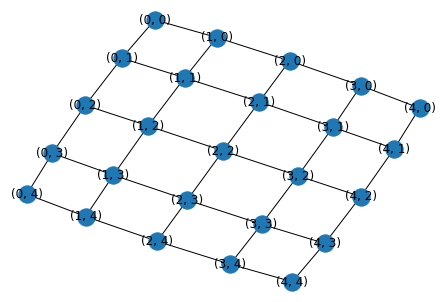

In [11]:
def generate_board(n, m):
  return nx.grid_2d_graph(n, m)

n =  5#@param {type:"integer"}
m =  5#@param {type:"integer"}

G = nx.grid_2d_graph(n, m)
pos = nx.spring_layout(G, iterations=100)
nx.draw(G, pos, with_labels=True)

In [5]:
class Board:
    def __init__(self, m, n):
        self.m, self.n = m, n
        self.G = nx.grid_2d_graph(m, n)

A cada uno de los jugadores se le asignara una copia del grafo representativo del tablero. Cada uno de estos debera asignar los nodos que representan posiciones en donde son ganadores en su copia. Asimismo, cada jugador enemigo representará una ausencia del nodo en esa posicion $x, y$, esto cambiará los posibles movimientos del jugador.

In [15]:
# Asignación de las posiciones de cada jugador            
class Player:
  def __init__(self, n_player, board):
    # Player positions
    #       1. Top
    #       2. Bottom
    #       3. Left
    #       4. Right

    self.n_player = n_player
    self.G = board.G.copy()
    self.x, self.y = board.n // 2, board.m - 1

    nx.set_node_attributes(self.G, False, 'is_winning_pos')
    for i in range(board.n):
        self.G.nodes[(0, i)]['is_winning_pos'] = True

    self.G.remove_node((0, board.n // 2))
    self.G.remove_node((board.m // 2, 0))
    self.G.remove_node((board.m // 2, board.n - 1))

In [16]:
board = Board(9, 9)

n_players = 4#@param {type:"integer"}

players = []
for n_player in range(n_players):
  player = Player(n_player, board)
  print(player.G.nodes(data=True))

[((0, 0), {'is_winning_pos': True}), ((0, 1), {'is_winning_pos': True}), ((0, 2), {'is_winning_pos': True}), ((0, 3), {'is_winning_pos': True}), ((0, 5), {'is_winning_pos': True}), ((0, 6), {'is_winning_pos': True}), ((0, 7), {'is_winning_pos': True}), ((0, 8), {'is_winning_pos': True}), ((1, 0), {'is_winning_pos': False}), ((1, 1), {'is_winning_pos': False}), ((1, 2), {'is_winning_pos': False}), ((1, 3), {'is_winning_pos': False}), ((1, 4), {'is_winning_pos': False}), ((1, 5), {'is_winning_pos': False}), ((1, 6), {'is_winning_pos': False}), ((1, 7), {'is_winning_pos': False}), ((1, 8), {'is_winning_pos': False}), ((2, 0), {'is_winning_pos': False}), ((2, 1), {'is_winning_pos': False}), ((2, 2), {'is_winning_pos': False}), ((2, 3), {'is_winning_pos': False}), ((2, 4), {'is_winning_pos': False}), ((2, 5), {'is_winning_pos': False}), ((2, 6), {'is_winning_pos': False}), ((2, 7), {'is_winning_pos': False}), ((2, 8), {'is_winning_pos': False}), ((3, 0), {'is_winning_pos': False}), ((3, 1),

Como se puede observar en el código de la parte superior, cada uno de los jugadores recibe una copia del grafo que representa el tablero del juego. El código se implemento de tal forma que cada uno de los jugadores tenga la misma perspectiva del tablero con respecto a los otros. Es decir, si el un jugador $x$ tuviera como posición inicial $(4, 8)$, entonces todos los demás jugadores también tendrán como posición inicial $(4, 8). Esto es puede realizar. Para poder hacer esto se requiere de una función que permita rotar las coordenadas de un jugador y devolver las coordenadas con respecto a otro jugador o al tablero mismo. Es por lo anterior que se está haciendo uso de la matriz de rotación, la cual nos permitirá realizar las rotaciones necesarios para obtener transformar las posiciones relativas a cada uno de los jugadores.

In [13]:
def rotate(x, y, theta, c):
  x, y = x - c[0], y - c[1]

  _x = round(x * cos(theta * pi / 180) - y * sin(theta * pi / 180))
  _y = round(x * sin(theta * pi / 180) + y * cos(theta * pi / 180))

  x, y = c[0] + _x, c[1] + _y

  return x, y

Es importante notar, que este función solo es util cuando la matriz que representa el grafo del tablero es una matriz cuadrada; es decir, que tiene la misma cantidad de filas y columnas. Por suerte nuestra, el juego se realiza en un tablero de $9 \times 9$, por lo que se usó esta herramienta para el desarrollo del proyecto.

Asimismo, se requiere de funciones que nos permitán retirar los nodos  aristas de los grafos, y también añadirlas. Esto permitirá retirar los nodos en donde los peones enemigos se encuentran ubicados y donde el jugador coloca bloques. Al eliminar un nodo, sin embargo, no podemos solo retirarlo, sino que tenemos que agregar o retirar aristas que cambian por las reglas de juego.

Para su implementación se realizo una función `add_node_util`, `add_edge_util`, `remove_node_util` y `remove_edge_util`

In [9]:
def remove_node_util(G, node):
  if node in G.nodes:
    G.remove_node(node)

def add_node_util(G, node):
  if node not in G.nodes:
    G.add_node(node)


def remove_edge_util(G, u, v):
  if u in G.nodes and v in G.nodes:
    if (u, v) in G.edges:
      G.remove_edge(u, v)
    if (v, u) in G.edges:
      G.remove_edge(v, u)

def add_edge_util(G, u, v):
  if u in G.nodes and v in G.nodes:
    if (u, v) not in G.edges and (v, u) not in G.edges:
      G.add_edge(u, v)

def get_attr_val(G, node, attribute):
  if node in G.nodes:
    return G.nodes[node][attribute]

Estas funciones se realizaron para evitar las validaciones repetidamente al momente de realizar operaciones con el grafo.

Las funcione utilizadas para remover y agregar nodos son las que se presentan a continuación.

In [8]:
def add_node(G, x, y):
  add_node_util(G, (y, x))

  add_edge_util(G, (y, x), (y, x - 1))
  add_edge_util(G, (y, x), (y, x + 1))

  if (y + 1, x) in G.nodes and (y - 1, x) in G.nodes:
    remove_edge_util(G, (y - 1, x), (y + 1, x))
    add_edge_util(G, (y, x), (y + 1, x))
    add_edge_util(G, (y, x), (y - 1, x))
  elif (y + 1, x) not in G.nodes:
    add_edge_util(G, (y, x), (y - 1, x))
    remove_edge_util(G, (y + 2, x), (y + 1, x - 1))
    remove_edge_util(G, (y + 2, x), (y + 1, x + 1))
    add_edge_util(G, (y, x), (y + 2, x))
  elif (y - 1, x) not in G.nodes:
    add_edge_util(G, (y, x), (y + 1, x))
    remove_edge_util(G, (y + 1, x), (y, x - 1))
    remove_edge_util(G, (y + 1, x), (y, x + 1))
    add_edge_util(G, (y, x), (y - 2, x))

  # if get_attr_val(G, (y, x + 1), 'is_winning_pos') or get_attr_val(G, (y, x - 1), 'is_winning_pos'):
  #    G.nodes[(y, x)]['is_winning_pos'] = True
  # else:
  #    G.nodes[(y, x)]['is_winning_pos'] = False

def remove_node(G, x, y):
  remove_node_util(G, (y, x))

  if (y - 1, x) in G.nodes and (y + 1, x) in G.nodes:
    add_edge_util(G, (y + 1, x), (y - 1, x))
  elif (y + 1, x) not in G.nodes:
    add_edge_util(G, (y + 2, x), (y + 1, x - 1))
    add_edge_util(G, (y + 2, x), (y + 1, x + 1))
  elif (y - 1, x) not in G.nodes:
    add_edge_util(G, (y + 1, x), (y, x - 1))
    add_edge_util(G, (y + 1, x), (y, x + 1))

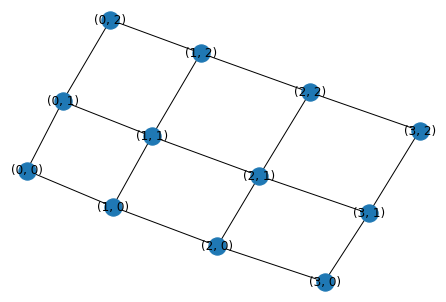

In [14]:
filas    = 4#@param {type:"integer"}
columnas = 3#@param {type:"integer"}

graph = nx.grid_2d_graph(filas, columnas)

pos = nx.spring_layout(G, iterations=100)
nx.draw(graph, pos, with_labels=True)

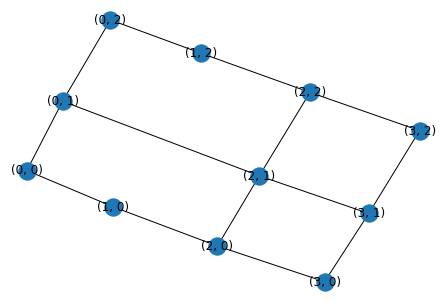

In [17]:
# nodo a eliminar
nodo_x = 1#@param {type:"integer"}
nodo_y = 1#@param {type:"integer"}


remove_node(graph, nodo_y, nodo_x)
nx.draw(graph, pos, with_labels=True)

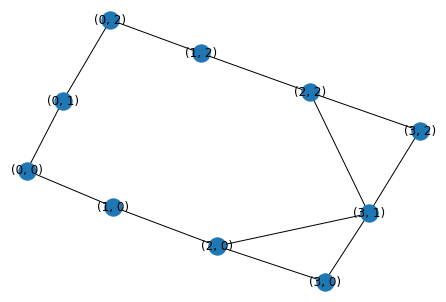

In [18]:
nodo_x = 2#@param {type:"integer"}
nodo_y = 1#@param {type:"integer"}


remove_node(graph, nodo_y, nodo_x)
nx.draw(graph, pos, with_labels=True)

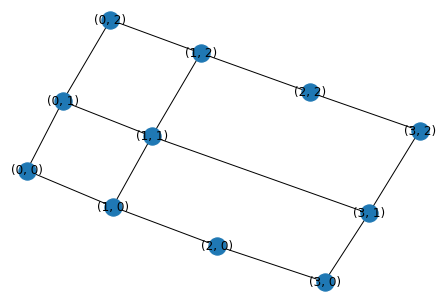

In [19]:
# nodo a agregar
nodo_x = 1#@param {type:"integer"}
nodo_y = 1#@param {type:"integer"}


add_node(graph, nodo_y, nodo_x)
nx.draw(graph, pos, with_labels=True)

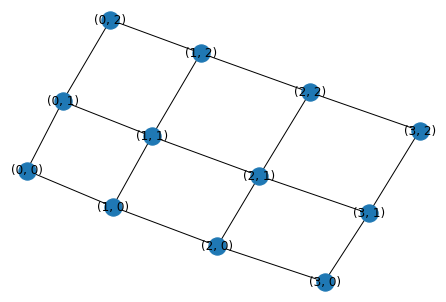

In [20]:
# nodo a agregar
nodo_x = 2#@param {type:"integer"}
nodo_y = 1#@param {type:"integer"}


add_node(graph, nodo_y, nodo_x)
nx.draw(graph, pos, with_labels=True)

# Resultados
Los resultados obtenidos a partir de las pruebas realizadas son los siguientes:

|Algoritmos\tiempos| Board 9x9 | Board 19x19 | Board 29x29 |Board 39x39 |Board 49x49 |Board 59x59 |Board 69x69 |
|-----| ---------- | ---------- |------------|------------|------------|------------|------------|
|Dijkstra| 0.0008312066396077474   | 0.008869295534880264  |0.028773950070750957  |0.06623631299928177   |0.13009375020077354  |0.22743589915926493   |0.37364022340625525  |
|A\*| 0.0018521717616489955  | 0.011450902275417162   | 0.03586606025695801  | 0.0777400060631763  | 0.14785813395656758 | 0.25513941829741316   | 0.4036994821341463   |
|Bellman-Ford| 0.0032772336687360492   | 0.024251431226730347   | 0.07669480641682942  | 0.1744460429268322   | 0.3340913715647228   | 0.5756588356657178   | 0.9103079602876062   |
|Shortest path| 0.00014236995152064731   | 0.0015589793523152669   | 0.004732141307756013   | 0.010964301499453459   | 0.02068365509830304   | 0.035014927699303755   | 0.05605499042096988  |

Los valores de la tabla anterior corresponden a la cantidad de tiempo en
segundos que cada algoritmo demora en elegir la ruta más corta hacia la meta.
Como se puede apreciar el algoritmo que crece a mayor velocidad es Bellman-Ford, mientras que
el de menor crecimiento es shortest path(implementado por networkx).

Además, se tomaron dichos valores para las pruebas, ya que se observó que en
los tableros de lado mayor a 70 casilleros el tiempo que demora en ganar un jugador es tan alto que no se llegaba a terminar la prueba.
Sin embargo, si es posible ajustar un tablero con más de 70 casilleros de lado.

# Conclusiones



# Bibliografia
Introduction to A*. (s. f.). Recuperado 19 de septiembre de 2020, de http://theory.stanford.edu/%7Eamitp/GameProgramming/AStarComparison.html

Garg, P. (s. f.). Breadth First Search Tutorials & Notes | Algorithms. Recuperado 19 de septiembre de 2020, de https://www.hackerearth.com/practice/algorithms/graphs/breadth-first-search/tutorial/

Garg, P. (s. f.-b). Depth First Search Tutorials & Notes | Algorithms. Recuperado 19 de septiembre de 2020, de https://www.hackerearth.com/practice/algorithms/graphs/depth-first-search/tutorial/

GeekForGeeks. (s. f.). Dijsktra’s algorithm. Recuperado 19 de septiembre de 2020, de https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/